In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
data = np.loadtxt("Bol.csv", delimiter=",", dtype=str)
TF = data[:, 0]
theta = data[:, 1]
phi = data[:, 2]

In [36]:
TF = [1540,
1550,
1558,
1565,
1570,
1575,
1579,
1582,
1584,
1586,
1588,
1589,
1592,
1595,
1598,
1603,
1610,
1620,
1630,
1645,
1660]

theta = [50,
60,
69,
83,
95.5,
115,
125,
132,
134,
134,
135,
135,
131.5,
129.5,
124,
117.5,
106,
90,
76,
62,
53]

phi = [162,
157,
151.4,
146.2,
138.6,
127,
115,
104.8,
100,
95,
90,
87.8,
82.1,
80.1,
69.9,
61.1,
53.7,
44.4,
36,
29.3,
26.3,
]

In [37]:
omega = [2*np.pi/Ele for Ele in TF]

In [38]:
print(TF)
print(theta)
print(phi)

[1540, 1550, 1558, 1565, 1570, 1575, 1579, 1582, 1584, 1586, 1588, 1589, 1592, 1595, 1598, 1603, 1610, 1620, 1630, 1645, 1660]
[50, 60, 69, 83, 95.5, 115, 125, 132, 134, 134, 135, 135, 131.5, 129.5, 124, 117.5, 106, 90, 76, 62, 53]
[162, 157, 151.4, 146.2, 138.6, 127, 115, 104.8, 100, 95, 90, 87.8, 82.1, 80.1, 69.9, 61.1, 53.7, 44.4, 36, 29.3, 26.3]


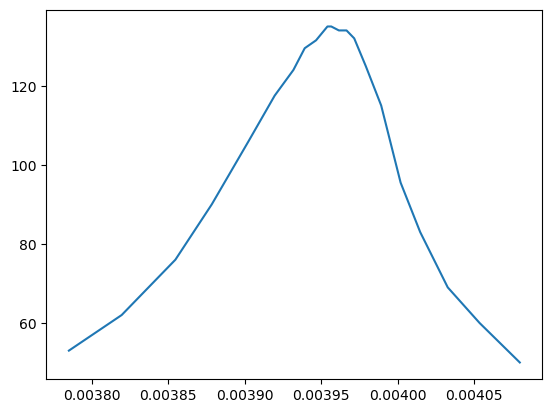

In [39]:
plt.plot(omega, theta)

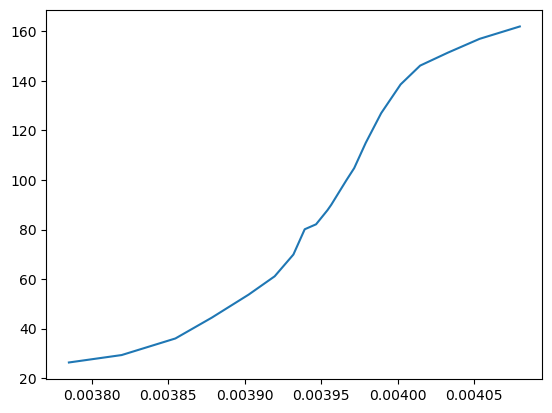

In [43]:
plt.plot(omega, phi)

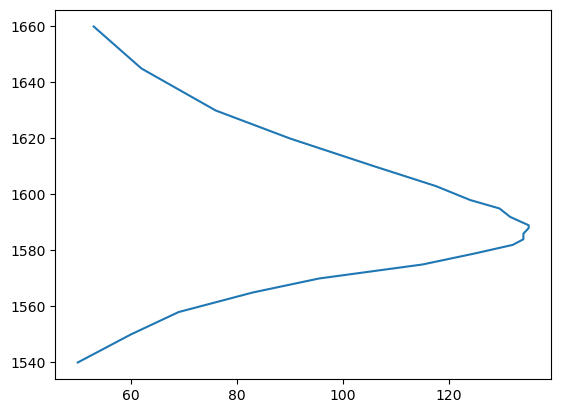

In [45]:
plt.plot(theta, TF)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_linear_fit(x, y, xName, yName, xUnit, yUnit):   
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_fit = slope * x + intercept
    r_squared = r_value ** 2

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, y,'--x',label='Original Data', linewidth=1)
    plt.plot(x, y_fit, color='red', label='Fitting Line')
    plt.xlabel(f'${xName}$/$\\mathrm{{{xUnit}}}$')
    plt.ylabel(f'${yName}$/$\\mathrm{{{yUnit}}}$')
    plt.title('Linear Fitting')
    plt.legend()


    equation = f'y = {slope:.3f}x + {intercept:.3f}'
    # truncated_rSquare = float(str(r_squared)[:str(r_squared).find('.') + 2 + next((i for i, c in enumerate(str(r_squared).split('.')[1]) if c != '9'), len(str(r_squared).split('.')[1]))])
    truncated_rSquare_text = f"$R^2$ = " + str(float(str(r_squared)[:str(r_squared).find('.') + 2 + next((i for i, c in enumerate(str(r_squared).split('.')[1]) if c != '9'), len(str(r_squared).split('.')[1]))]))
    print(r_squared)
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black')
    plt.text(0.05, 0.95, 
             equation + '\n' + truncated_rSquare_text,
             transform=plt.gca().transAxes,
             fontsize=12, 
             verticalalignment='top',  
             bbox=props
    )

    residuals = y - y_fit
    plt.subplot(1, 2, 2)
    plt.scatter(x, residuals, marker='x')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(f'${xName}$/{xUnit}')
    plt.ylabel(f'Residual/$\\mathrm{{{yUnit}}}$')
    plt.title('Residual Distribution')

    plt.tight_layout()
    plt.show()